# APPLIED DATA SCIENCE 1 ASSIGNMENT
## ON
## VISUALISATION (20%)
### BY
## Caleb Vite Justice

#### Context
IMDB (Internet Movie Database) is one of the largest online databases for movies and television shows, providing comprehensive information about movies, including ratings and reviews from its vast user base. The IMDB ratings are widely used as a benchmark for the popularity and success of movies.

This dataset contains the top 250 rated movies on IMDB as of 2022, providing a snapshot of the most popular and highly rated movies of recent times. By analyzing this dataset, one can gain insights into the movie industry, such as trends in movie ratings and popular genres.

The data was scraped from the IMDB website for educational purposes and to provide a publicly available dataset for others to use and build upon.
I wanted to explore and understand the factors that contribute to a movie's popularity and success. IMDB is one of the largest and most trusted movie rating websites, so I decided to scrape its top 250 movies to gain insights into the movie-making industry.

#### Libraries and Data Importation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_imdb = pd.read_excel("IMDB Top 250 Movies.xlsx", index_col = "rank")

#### DataFrame Description

In [3]:
df_imdb.describe()

,year,rating,run_time(ms),box_office
count,250.000000,250.000000,249.000000,2.170000e+02
mean,1986.360000,8.307200,129.293173,2.382076e+08
std,25.125356,0.229081,29.967428,3.825392e+08
min,1921.000000,8.000000,45.000000,6.700000e+01
25%,1966.250000,8.100000,109.000000,8.574081e+06
50%,1994.000000,8.200000,127.000000,7.403672e+07
75%,2006.000000,8.400000,146.000000,3.217527e+08
max,2022.000000,9.300000,238.000000,2.799439e+09


In [4]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          250 non-null    object 
 1   year          250 non-null    int64  
 2   rating        250 non-null    float64
 3   genre         250 non-null    object 
 4   certificate   249 non-null    object 
 5   run_time(ms)  249 non-null    float64
 6   tagline       250 non-null    object 
 7   budget        209 non-null    object 
 8   box_office    217 non-null    float64
 9   casts         250 non-null    object 
 10  directors     250 non-null    object 
 11  writers       250 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 25.4+ KB


In [5]:
df_imdb.head()

,name,year,rating,genre,certificate,run_time(ms),tagline,budget,box_office,casts,directors,writers
rank,,,,,,,,,,,,
1,The Shawshank Redemption,1994,9.3,Drama,R,142.0,Fear can hold you prisoner. Hope can set you f...,25000000,2.888450e+07,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
2,The Godfather,1972,9.2,"Crime,Drama",R,175.0,An offer you can't refuse.,6000000,2.503418e+08,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,152.0,Why So Serious?,185000000,1.006234e+09,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
4,The Godfather Part II,1974,9.0,"Crime,Drama",R,142.0,All the power on earth can't change destiny.,13000000,4.796192e+07,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,156.0,Life Is In Their Hands -- Death Is On Their Mi...,350000,9.550000e+02,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [6]:
df_imdb.isna().sum()

name             0
year             0
rating           0
genre            0
certificate      1
run_time(ms)     1
tagline          0
budget          41
box_office      33
casts            0
directors        0
writers          0
dtype: int64

In [7]:
df_imdb = df_imdb.dropna()

In [8]:
genr = ""
for i in df_imdb['genre']:
    genr = genr+ "," +i
all_genre = genr.split(',')[1:]
unique_genres = list(set(all_genre))

In [9]:
data = []
for i in unique_genres:
    c = 0
    for j in df_imdb['genre']:
        if i in j:
            c += 1
    data.append([i, c])

In [10]:
gen_df = pd.DataFrame(data, columns=['Genre', 'Frequency'])
gen_df.sort_values(by = 'Frequency', ascending = False, inplace = True)
gen_df = gen_df.head(10)

In [11]:
# Set the figure style
plt.style.use('fivethirtyeight')

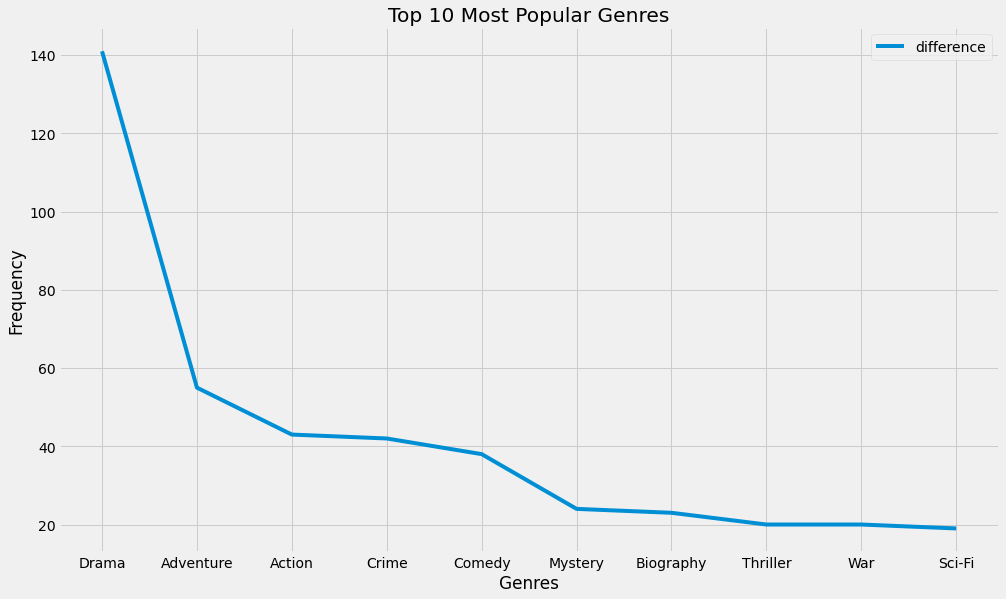

In [22]:
plt.figure(figsize = (15,9))
plt.plot('Genre', 'Frequency', data = gen_df, label = "difference")
plt.title('Top 10 Most Popular Genres')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.legend()
plt.show()

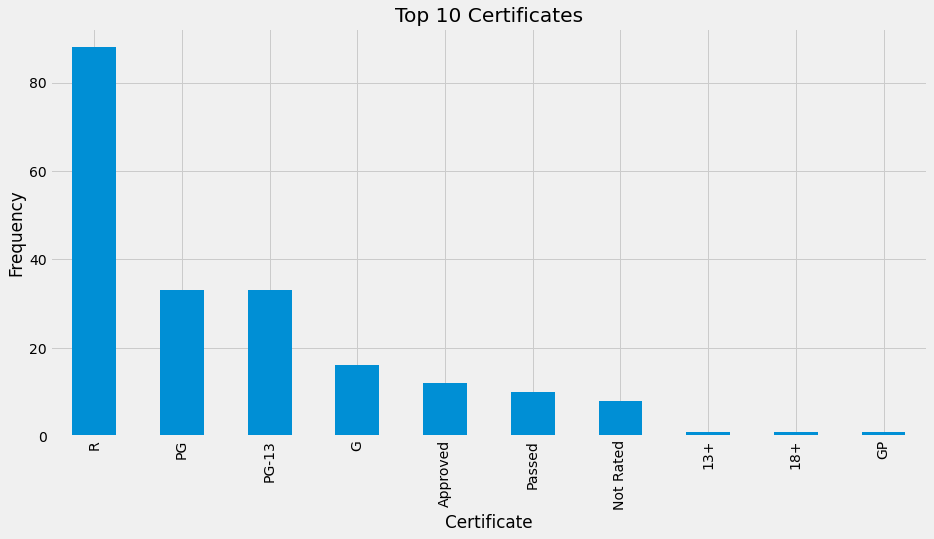

In [13]:
plt.figure(figsize=(14,7))
df_imdb.groupby('certificate').size().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.xlabel('Certificate')
plt.ylabel('Frequency')
plt.title("Top 10 Certificates")
plt.show()

In [14]:
df_imdb['year'].sort_values()

rank
128    1921
177    1925
52     1931
242    1934
47     1936
       ... 
75     2019
210    2019
130    2020
150    2021
106    2022
Name: year, Length: 205, dtype: int64

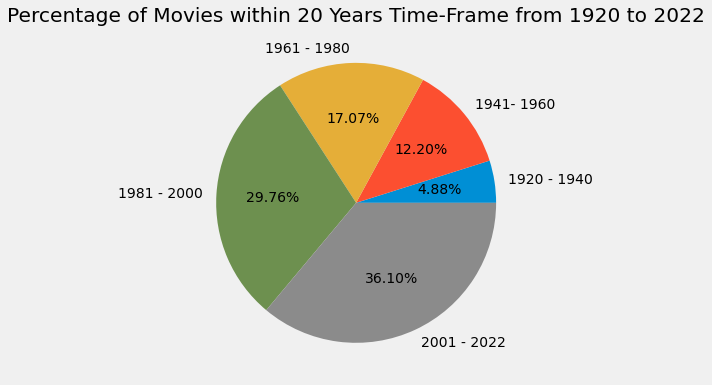

In [15]:
a = 0
b = 0
c = 0
d = 0
e = 0

for i in df_imdb['year']:
    if i > 1920 and i <= 1940:
        a += 1
    elif i > 1940 and i <= 1960:
        b += 1
    elif i > 1960 and i <= 1980:
        c += 1
    elif i > 1980 and i <= 2000:
        d += 1
    else: 
        e += 1
        
data = [a, b, c, d, e]
label = ['1920 - 1940', '1941- 1960', '1961 - 1980', '1981 - 2000', '2001 - 2022']
plt.figure(figsize=(12,6))
plt.pie(data, labels = label, autopct='%.2f%%')
plt.title("Percentage of Movies within 20 Years Time-Frame from 1920 to 2022")
plt.show()

In [16]:
# Filter for durations shorter than 90 minutes
short_movies = df_imdb[df_imdb['run_time(ms)'] < 90]

# Print the first 5 rows of short_movies
short_movies.head()

,name,year,rating,genre,certificate,run_time(ms),tagline,budget,box_office,casts,directors,writers
rank,,,,,,,,,,,,
36,The Lion King,1994,8.5,"Animation,Adventure,Drama",G,88.0,See it for the first time ever in 3D (2011 3D ...,45000000,968511805.0,"Matthew Broderick,Jeremy Irons,James Earl Jone...","Roger Allers,Rob Minkoff","Irene Mecchi,Jonathan Roberts,Linda Woolverton"
44,Grave of the Fireflies,1988,8.5,"Animation,Drama,War",Not Rated,89.0,imationDramaWar,3700000,516962.0,"Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguch...",Isao Takahata,"Akiyuki Nosaka,Isao Takahata"
47,Modern Times,1936,8.5,"Comedy,Drama,Romance",G,87.0,He stands alone as the greatest entertainer of...,1500000,463618.0,"Charles Chaplin,Paulette Goddard,Henry Bergman...",Charles Chaplin,Charles Chaplin
52,City Lights,1931,8.5,"Comedy,Drama,Romance",G,87.0,HE RETURNS -And the world rocks again with lau...,1500000,50419.0,"Charles Chaplin,Virginia Cherrill,Florence Lee...",Charles Chaplin,"Charles Chaplin,Harry Carr,Harry Crocker"
60,Paths of Glory,1957,8.4,"Drama,War",Approved,88.0,Never has the screen thrust so deeply into the...,935000,5252.0,"Kirk Douglas,Ralph Meeker,Adolphe Menjou,Georg...",Stanley Kubrick,"Stanley Kubrick,Calder Willingham,Jim Thompson"


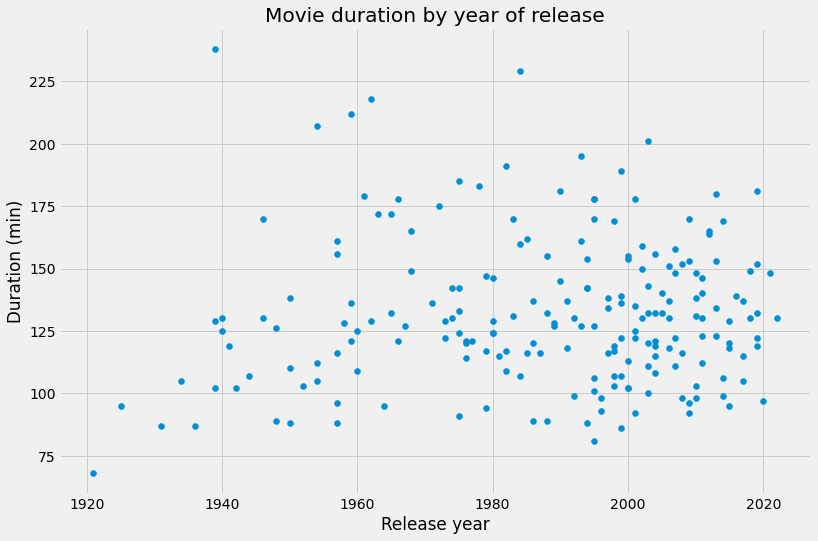

In [17]:
plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(df_imdb['year'], df_imdb['run_time(ms)'])

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [18]:
df_imdb.describe()

,year,rating,run_time(ms),box_office
count,205.000000,205.000000,205.000000,2.050000e+02
mean,1987.541463,8.322439,131.795122,2.518781e+08
std,23.386868,0.239452,29.681759,3.892873e+08
min,1921.000000,8.000000,68.000000,6.700000e+01
25%,1974.000000,8.100000,112.000000,1.877874e+07
50%,1994.000000,8.300000,129.000000,8.386203e+07
75%,2006.000000,8.400000,148.000000,3.558223e+08
max,2022.000000,9.300000,238.000000,2.799439e+09


In [19]:
df_imdb["box_off_m"] = df_imdb["box_office"]/1000000
df_imdb.describe()

,year,rating,run_time(ms),box_office,box_off_m
count,205.000000,205.000000,205.000000,2.050000e+02,205.000000
mean,1987.541463,8.322439,131.795122,2.518781e+08,251.878078
std,23.386868,0.239452,29.681759,3.892873e+08,389.287338
min,1921.000000,8.000000,68.000000,6.700000e+01,0.000067
25%,1974.000000,8.100000,112.000000,1.877874e+07,18.778738
50%,1994.000000,8.300000,129.000000,8.386203e+07,83.862032
75%,2006.000000,8.400000,148.000000,3.558223e+08,355.822319
max,2022.000000,9.300000,238.000000,2.799439e+09,2799.439100


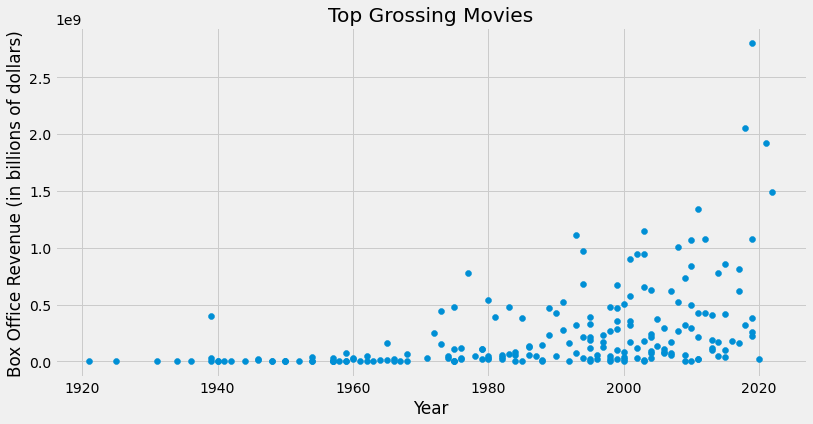

In [20]:
# Data for the top-grossing movies each year from 1920 to 2020

# Create the line plot
plt.figure(figsize=(12,6))
plt.scatter(df_imdb['year'], df_imdb['box_office'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Box Office Revenue (in billions of dollars)')
plt.title('Top Grossing Movies')

# Show the plot
plt.show()

In [21]:
genre_group = df_imdb.groupby("genre").sum()
genre_group

,year,rating,run_time(ms),box_office,box_off_m
genre,,,,,
"Action,Adventure",3970,16.6,242.0,8.640978e+08,864.097777
"Action,Adventure,Drama",10025,43.5,874.0,6.295208e+09,6295.207851
"Action,Adventure,Fantasy",9964,41.9,667.0,4.364990e+09,4364.990377
"Action,Adventure,Mystery",1959,8.3,136.0,1.423190e+05,0.142319
"Action,Adventure,Sci-Fi",10022,41.9,681.0,4.545387e+09,4545.387092
...,...,...,...,...,...
"Horror,Mystery,Thriller",1960,8.5,109.0,3.205292e+07,32.052925
"Horror,Sci-Fi",1979,8.5,117.0,1.062855e+08,106.285522
"Mystery,Romance,Thriller",1958,8.3,128.0,7.798146e+06,7.798146
